<a href="https://colab.research.google.com/github/brittanyasare04/eda_assignment/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [1]:
! git clone https://github.com/ds3001f25/eda_assignment.git

Cloning into 'eda_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 799.41 KiB | 9.52 MiB/s, done.


In [2]:
!cd eda_assignment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
airbnb = pd.read_csv('./eda_assignment/data/airbnb_hw.csv')

In [5]:
# Listing out the dimensions of the data set
print("Dimensions:", airbnb.shape[0], "rows,", airbnb.shape[1], "columns")

#Listing out the variables of the data set
print("Variables:", airbnb.columns)

#Examining the first few rows of the data set
print(airbnb.head(10))

Dimensions: 30478 rows, 13 columns
Variables: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
    Host Id Host Since                                 Name Neighbourhood   \
0   5162530        NaN      1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN      Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                 Sunny Room in Harlem      Manhattan   
3       500  6/26/2008   Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008             Trendy Times Square Loft      Manhattan   
5      1039  7/25/2008   Big Greenpoint 1BD w/ Skyline View       Brooklyn   
6      1783  8/12/2008                         Amazing Also      Manhattan   
7      2078  8/15/2008  Colorful, quiet, & near the subway!       Brooklyn

The dimensions of the data consists of 30478 rows and 13 columns. There are 30478 observations/airbnbs listed in NYC. The variables include Name, Host Name, Neighborhood, Property type, Review Score Rating, Room Type, Zipcode, Bed, Number of Records, Number of Reviews, Prices, Reviews Scores Rating.

In [6]:
cross_tab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(cross_tab)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

So we can see that is most common to see apartments or private/shared rooms for booking and castles, tents and treehouses are more uncommon to come by. It is mort common to find a private room in apartments and after that would be in a house.

<function matplotlib.pyplot.show(close=None, block=None)>

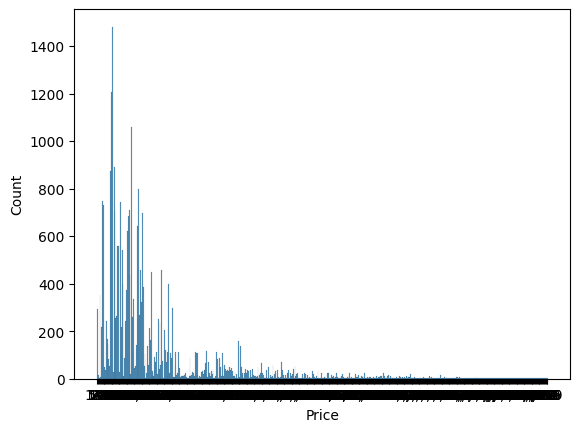

In [7]:
# Making a histogram for the variable price
sns.histplot(airbnb['Price'])
plt.show

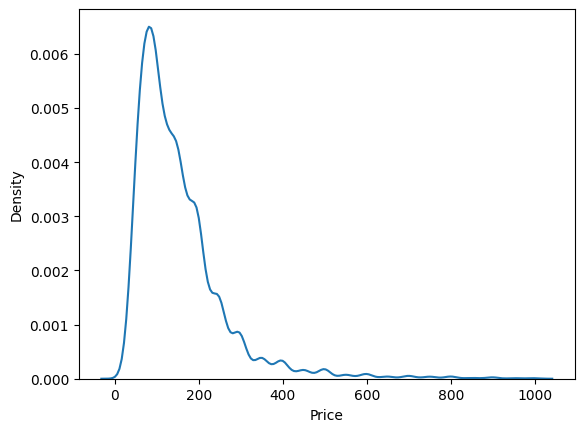

In [8]:
# Making a Kernel Denisty plot for the variable price
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
sns.kdeplot(airbnb['Price'])
plt.show()

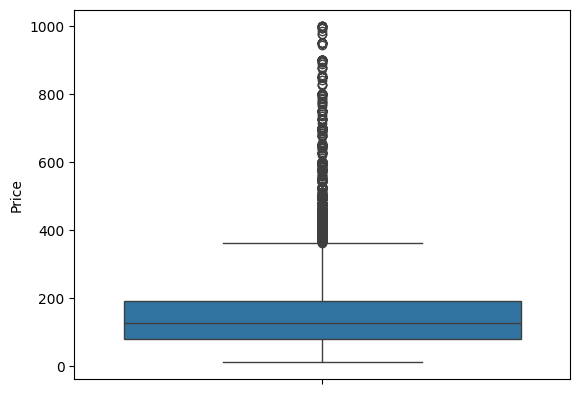

In [9]:
#making a boxplot for the variable price
sns.boxplot(airbnb['Price'])
plt.show()

In [10]:
#making a statistical description of the variable price
airbnb['Price'].describe()

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


The plots are badly scaled with there being many outliers.

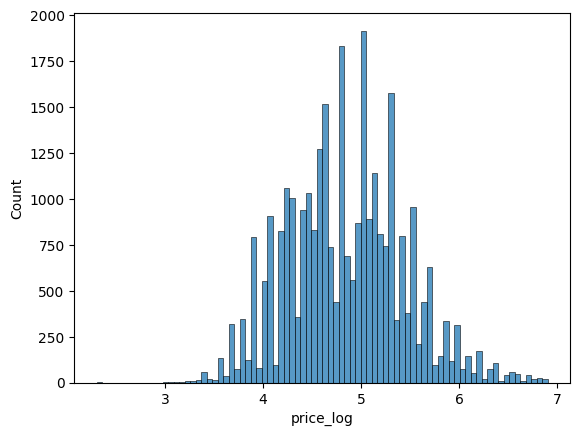

In [11]:
#Making a histogram with the variable price_log
airbnb['price_log'] = np.log(airbnb['Price'])
sns.histplot(airbnb['price_log'])
plt.show()

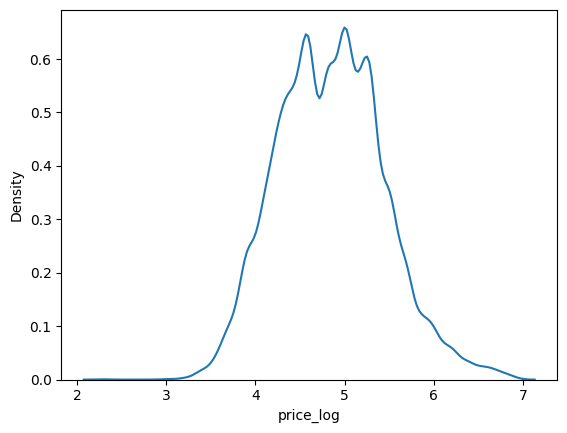

In [12]:
# Making a Kernel Density plot with the variable price_log
sns.kdeplot(airbnb['price_log'])
plt.show()

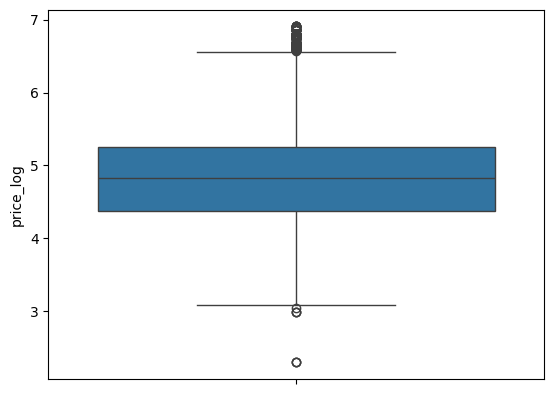

In [13]:
#Making a box plot with the variable price_log
sns.boxplot(airbnb['price_log'])
plt.show()

In [14]:
#Statistical description of price_log
airbnb['price_log'].describe()

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


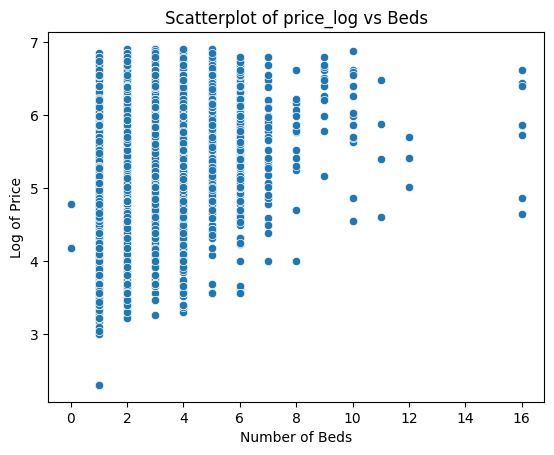

In [15]:
# Make a scatterplot of price_log and Beds
sns.scatterplot(x='Beds', y='price_log', data=airbnb)
plt.title('Scatterplot of price_log vs Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.show()

In [16]:
# Use .groupby() to compute a description of Price conditional on/grouped by the number of beds
price_by_beds = airbnb.groupby('Beds')['Price'].describe()
print(price_by_beds)

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

A pattern that can be seen here is that when the amount of beds increased, the price of the airbnb overall increased as well. When the number of beds were lower, the average price was in the $200-300 range meanwhile the price range would go up with the bed prices. The standard deviation was extremely high for the places that had a higher amount of beds, meanwhile the variability was realitively lower for the lower amount of beds.

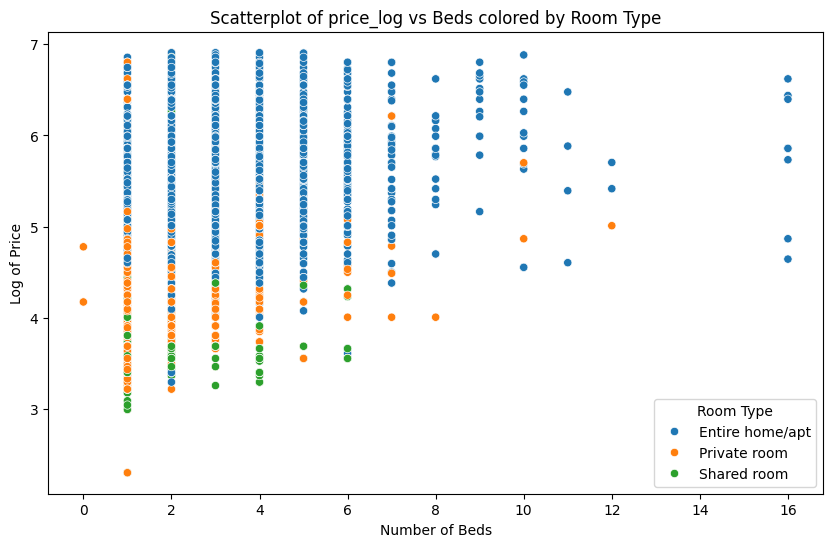

In [17]:
# Make a scatterplot of price_log and Beds, colored by Room Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Beds', y='price_log', hue='Room Type', data=airbnb)
plt.title('Scatterplot of price_log vs Beds colored by Room Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.show()

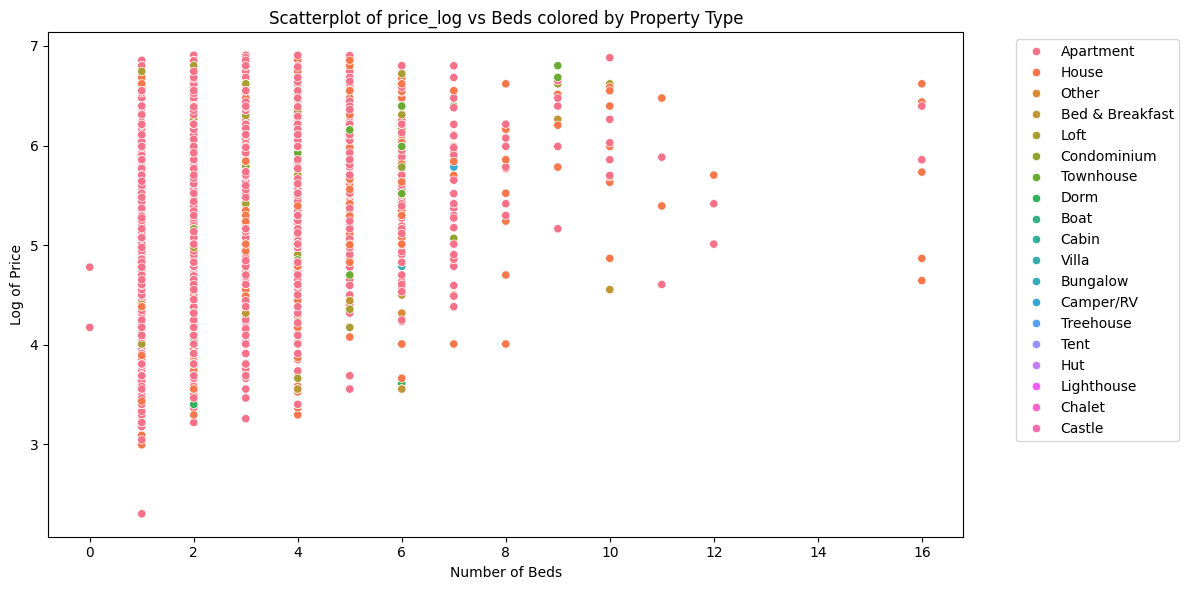

In [18]:
# Make a scatterplot of price_log and Beds, colored by Property Type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Beds', y='price_log', hue='Property Type', data=airbnb)
plt.title('Scatterplot of price_log vs Beds colored by Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the scatterplot, we can see that many of the residential areas were apartment, house, other, and bed & breakfast. These tended to have less than 7 beds available at a more reasonable price.

In [19]:
# Compute a description of Price conditional on Room Type and Property Type
price_by_room_property = airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_by_room_property)

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

On average, entire home/apt typically have the highest prices. On average, other property types than the ones listed are listed higher in price. Based on the information above, the distribution is skewed-right with high outliers, meaning the mean gets pulled up. This would indicate that the median is more reliable.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [20]:
# loading the drilling rigs data
drilling_rigs = pd.read_csv('./eda_assignment/data/drilling_rigs.csv')

In [26]:
# Listing out the dimensions of the data set
print("Dimensions:", drilling_rigs.shape[0], "rows,", drilling_rigs.shape[1], "columns")

#Listing out the variables of the data set
print("Variables:", drilling_rigs.columns)

#Examining the first few rows of the data set
print(drilling_rigs.head(10))

Dimensions: 623 rows, 11 columns
Variables: Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)', 'time'],
      dtype='object')
            Month  \
0    1973 January   
1   1973 February   
2      1973 March   
3      1973 April   
4        1973 May   
5       1973 June   
6  

There are 623 observations. There was 10 variables. Based on this data, the numeric variables are not being correctly read with several text saying "Not Available," so Pandas will read those obbjects as strings. In order to clean this we will need to change the month variable to an actual date format, corce "Not Available" to numeric and as missing values.

In [31]:
#Converting the Month variable to an ordered datetime
drilling_rigs['time'] = pd.to_datetime(drilling_rigs['Month'], format='mixed')

In [37]:
# Converting Not Available variable to numeric
drilling_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

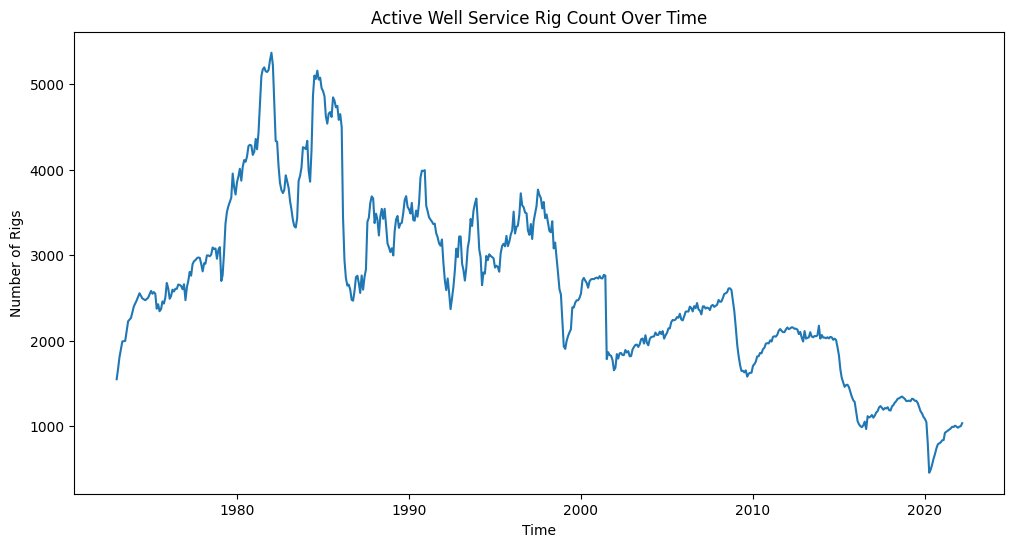

In [38]:
# Make a line plot of Active Well Service Rig Count (Number of Rigs) over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Active Well Service Rig Count (Number of Rigs)', data=drilling_rigs)
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

Based on the line graph, we can infer and see that over time, the number of active rigs decreased. With the most active rigs being in the 1980s and the least amount in 2020.

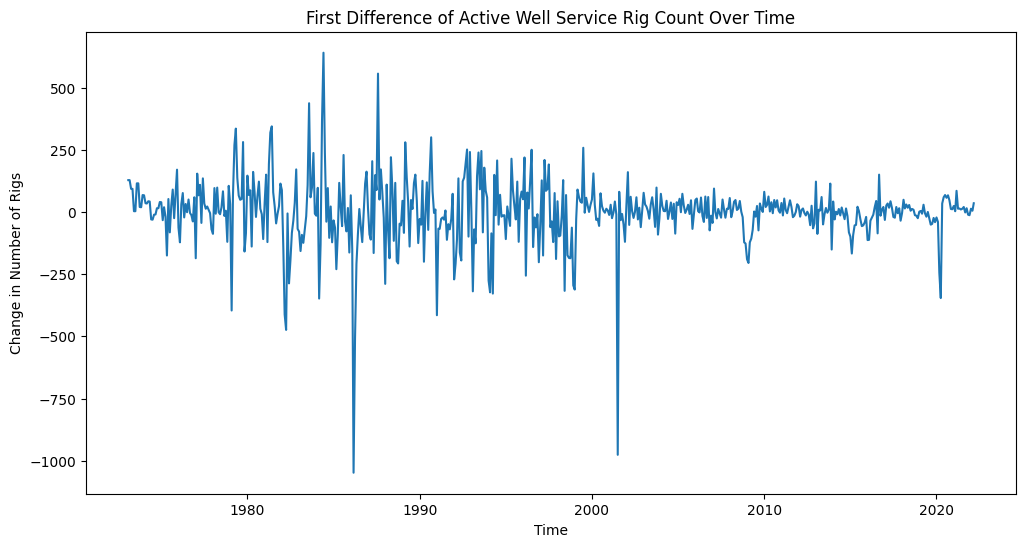

In [39]:
# Compute the first difference of Active Well Service Rig Count (Number of Rigs)
drilling_rigs['Rig Count First Difference'] = drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot the first difference over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Rig Count First Difference', data=drilling_rigs)
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.show()

Based on the graph, we can see that the most drastic difference in the number of rigs in the late 1980s and the change in the number of rigs as remained relatively steady in the 2000s.

In [33]:
# Melt the onshore and offshore rig count columns
rigs_melted = drilling_rigs.melt(
    id_vars=['time'],
    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
    var_name='Rig Type',
    value_name='Number of Rigs'
)

# Convert the 'Number of Rigs' column to numeric, coercing errors
rigs_melted['Number of Rigs'] = pd.to_numeric(rigs_melted['Number of Rigs'], errors='coerce')

display(rigs_melted.head())

,time,Rig Type,Number of Rigs
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


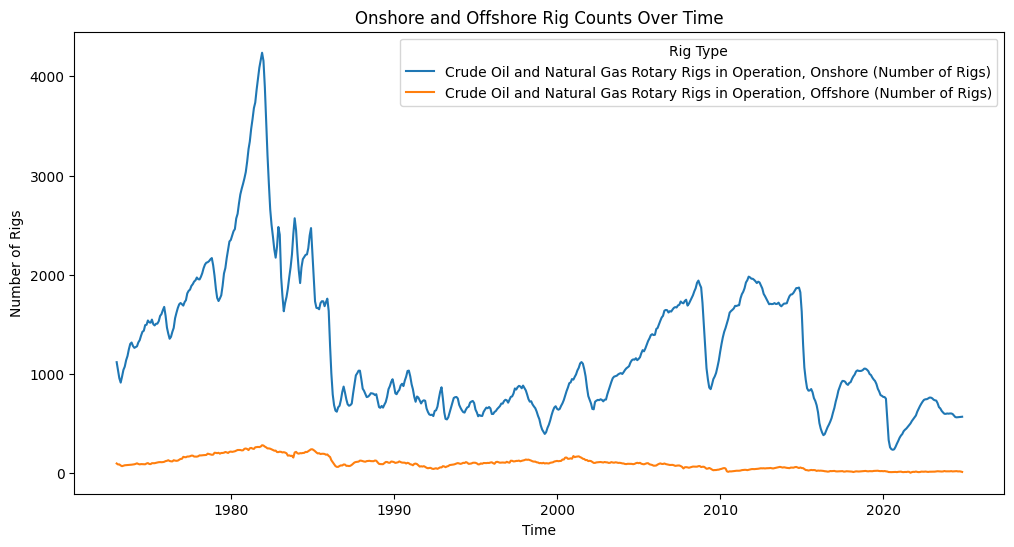

In [40]:
# Plot the melted series
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='Number of Rigs', hue='Rig Type', data=rigs_melted)
plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

In [41]:
!git config --global user.name "brittanyasare04"
!git config --global user.email "brittanyasare04@gmail.com"

In [42]:
!git status
!ls -la
!git add <assignment.ipynb>
!git commit -m "Brittany Asare - HW2 complete"
!git push origin main

fatal: not a git repository (or any of the parent directories): .git
total 20
drwxr-xr-x 1 root root 4096 Sep  8 00:47 .
drwxr-xr-x 1 root root 4096 Sep  8 00:44 ..
drwxr-xr-x 4 root root 4096 Sep  3 13:35 .config
drwxr-xr-x 4 root root 4096 Sep  8 00:47 eda_assignment
drwxr-xr-x 1 root root 4096 Sep  3 13:36 sample_data
/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git add <assignment.ipynb>'
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
